In [1]:
import cooltools
import pandas as pd
import numpy as np
import cooler
import bioframe
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import Normalize, LogNorm
from matplotlib import ticker
import matplotlib.pyplot as plt
import os
import cooltools.lib.plotting

In [2]:
# make matplotlib pdf-s text recognizable by evil-Adobe
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [ ]:
ls *.mcool

In [3]:
fls = ['BKO98-ATRA-5days-4-51-and-4-52-R1R2','BKO98-Ctrl-4-51-and-4-52-R1R2',
       'WT-ATRA-5days-4-51-and-4-52-R1R2','WT-Ctrl-4-51-and-4-52-R1R2']

In [ ]:
cooltools saddle GSE252149_CA-HiC-Dpn-SH-SY5Y-BKO98-ATRA-5days-4-51-and-4-52-R1R2.sampled.hg38.mapq_30.1000.mcool::/resolutions/100000 
CTtracks/GSE252149_CA-HiC-Dpn-SH-SY5Y-BKO98-ATRA-5days-4-51-and-4-52-R1R2_100kb_arms.Cent.vecs.tsv::CT  
Trans-Expected-arms/GSE252149_CA-HiC-Dpn-SH-SY5Y-BKO98-ATRA-5days-4-51-and-4-52-R1R2_100kb.trans.tsv
-o CTobs/f  --strength --fig pdf             --view ../Ozgun/hg38-arms22.tsv -t trans --vrange 0 2

In [ ]:
#only observed
for f in fls:
    fl = "cooltools saddle GSE252149_CA-HiC-Dpn-SH-SY5Y-"+f+".sampled.hg38.mapq_30.1000.mcool::/resolutions/100000 \
    CTtracks/GSE252149_CA-HiC-Dpn-SH-SY5Y-"+f+"_100kb_arms.Cent.vecs.tsv::CT  \
    Trans-Expected-arms/GSE252149_CA-HiC-Dpn-SH-SY5Y-"+f+"_100kb.trans.tsv\
    -o CTobs/"+f+"  --strength --fig pdf --view ../Ozgun/hg38-arms22.tsv -t trans --vrange 0 2"

    fl_long = "cooltools saddle GSE252149_CA-HiC-Dpn-SH-SY5Y-"+f+".sampled.hg38.mapq_30.1000.mcool::/resolutions/100000 \
    CTtracks/GSE252149_CA-HiC-Dpn-SH-SY5Y-"+f+"_100kb_arms.longCent.vecs.tsv::CT  \
    Trans-Expected-arms/GSE252149_CA-HiC-Dpn-SH-SY5Y-"+f+"_100kb_long.trans.tsv\
    -o CTobs/"+f+"_long  --strength --fig pdf --view ../Ozgun/hg38-arms-long.tsv -t trans --vrange 0 2"

    fl_short = "cooltools saddle GSE252149_CA-HiC-Dpn-SH-SY5Y-"+f+".sampled.hg38.mapq_30.1000.mcool::/resolutions/100000 \
    CTtracks/GSE252149_CA-HiC-Dpn-SH-SY5Y-"+f+"_100kb_arms.shortCent.vecs.tsv::CT  \
    Trans-Expected-arms/GSE252149_CA-HiC-Dpn-SH-SY5Y-"+f+"_100kb_short.trans.tsv\
    -o CTobs/"+f+"_short  --strength --fig pdf --view ../Ozgun/hg38-arms-short.tsv -t trans --vrange 0 2"

    os.system(fl)
    os.system(fl_long)
    os.system(fl_short)
    print("Done:",f)

In [ ]:
def plot_saddle(SC,nm,chrs):
    print(nm)
    # Create a GridSpec with 2 rows and 2 columns
    gs = GridSpec(2, 2, width_ratios=[1, 0.1], height_ratios=[0.2, 1],wspace=0.05,hspace=0.05,)

    # Create the figure and the subplots
    fig = plt.figure(figsize=(6, 6))

    # Heatmap in subplot (1, 0)
    ax2 = fig.add_subplot(gs[1, 0])
    mat= np.log10(SC)
    print("SC:",np.nanmin(SC),np.nanmax(SC))
    print("mat:",np.nanmin(mat),np.nanmax(mat))
    if (chrs=="short"):
        heatmap = ax2.imshow(np.log10(SC), cmap='fall',vmin=-5, vmax=-4,extent=[0, 2, 0, 2]) #for short
    else:
        heatmap = ax2.imshow(np.log10(SC), cmap='fall',vmin=-5.2, vmax=-4.8,extent=[0, 2, 0, 2]) #for long and all
    ax2.set_yticks([]) 
    desired_ticks = [0, 0.5, 1, 1.5, 2]
    mapped_ticks = np.interp(desired_ticks, [0, 2], [0, 2])
    ax2.set_xticks(mapped_ticks[::1])
    ax2.set_xticklabels(desired_ticks[::1])

    # Line plot in subplot (0, 0)
    ax1 = fig.add_subplot(gs[0, 0],sharex=ax2)
    diagonal_data = np.diag(SC)
    #print(diagonal_data)
    plt.plot(np.linspace(0, 2, len(diagonal_data)), diagonal_data, color='blue')
    print(np.nanmax(diagonal_data),np.nanmin(diagonal_data))



    if (chrs=="short"):
        ax1.set_ylim(0, 0.00016)  
        yticks = np.linspace(0, 0.00016, 5)
        ax1.set_yticks(yticks)
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_powerlimits((-3, 3))  # Adjust the power limits to your preference
        ax1.yaxis.set_major_formatter(formatter)
        ax1.axhline(y=0, color='grey', linestyle='--')
        ax1.axhline(y=0.00012, color='grey', linestyle='--')
        ax1.axhline(y=0.00008, color='grey', linestyle='--')
        ax1.axvline(x=1, color='grey', linestyle='--')
        
    else:
        ax1.set_ylim(0, 6e-5) #for long and all
        yticks = np.linspace(0, 6e-5, 4)
        ax1.set_yticks(yticks)
        formatter = ticker.ScalarFormatter(useMathText=True)
        formatter.set_powerlimits((-3, 3))  # Adjust the power limits to your preference
        ax1.yaxis.set_major_formatter(formatter)
        ax1.axhline(y=0, color='grey', linestyle='--')
        ax1.axhline(y=2e-5, color='grey', linestyle='--')
        ax1.axhline(y=4e-5, color='grey', linestyle='--')
        ax1.axvline(x=1, color='grey', linestyle='--')

    
    ax2.set_aspect(ax1.get_aspect())
    #ax1.set_xticks([])
    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    # Colorbar in subplot (1, 1)
    ax3 = fig.add_subplot(gs[1, 1])
    cbar = fig.colorbar(heatmap, cax=ax3, orientation='vertical')
    cbar.set_label('log10(observed)', rotation=90, labelpad=15)
    
    #for short comment this code
    if (chrs!="short"):
        cbar_ticks = cbar.get_ticks()[::2]
        cbar.set_ticks(cbar_ticks)
        cbar.set_ticklabels(cbar_ticks)
    
    formatter = ticker.FormatStrFormatter('%0.2f')
    cbar.ax.yaxis.set_major_formatter(formatter)

    plt.suptitle(nm)
    #plt.savefig("CTobs/"+nm+".pdf",bbox_inches='tight')
    plt.show()


In [ ]:
for f in fls[:1]:
    fl = np.load("CTobs/"+f+".saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    plot_saddle(SC,f+"_all","all")

In [ ]:
for f in fls:
    fl = np.load("CTobs/"+f+".saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    plot_saddle(SC,f+"_all","all")
for f in fls:
    fl = np.load("CTobs/"+f+"_long.saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    plot_saddle(SC,f+"_long","long")
for f in fls:
    fl = np.load("CTobs/"+f+"_short.saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    plot_saddle(SC,f+"_short","short")

In [ ]:
def plot_saddle_flexible(SC,nm,vmin,vmax,ylim,clabel,dr):
    print(nm)
    # Create a GridSpec with 2 rows and 2 columns
    gs = GridSpec(2, 2, width_ratios=[1, 0.1], height_ratios=[0.2, 1],wspace=0.05,hspace=0.05,)

    # Create the figure and the subplots
    fig = plt.figure(figsize=(6, 6))

    # Heatmap in subplot (1, 0)
    ax2 = fig.add_subplot(gs[1, 0])
    heatmap = ax2.imshow(np.log10(SC), cmap='fall',vmin=vmin, vmax=vmax,extent=[0, 2, 0, 2]) #for short
    
    ax2.set_yticks([]) 
    desired_ticks = [0, 0.5, 1, 1.5, 2]
    mapped_ticks = np.interp(desired_ticks, [0, 2], [0, 2])
    ax2.set_xticks(mapped_ticks[::1])
    ax2.set_xticklabels(desired_ticks[::1])

    # Line plot in subplot (0, 0)
    ax1 = fig.add_subplot(gs[0, 0],sharex=ax2)
    diagonal_data = np.diag(SC)
    #print(diagonal_data)
    plt.plot(np.linspace(0, 2, len(diagonal_data)), diagonal_data, color='blue')
    print(np.nanmin(diagonal_data),np.nanmax(diagonal_data))

    ax1.set_ylim(ylim[0], ylim[1]) #for long and all
    yticks = np.linspace(ylim[0], ylim[1], 5)
    ax1.set_yticks(yticks)
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3, 3))  # Adjust the power limits to your preference
    ax1.yaxis.set_major_formatter(formatter)
    ax1.axhline(y=ylim[0], color='grey', linestyle='--')
    ax1.axhline(y=ylim[0]+((ylim[1]-ylim[0])/2), color='grey', linestyle='--')
    ax1.axhline(y=ylim[1], color='grey', linestyle='--')
    ax1.axvline(x=1, color='grey', linestyle='--')

    ax2.set_aspect(ax1.get_aspect())
    #ax1.set_xticks([])
    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    # Colorbar in subplot (1, 1)
    ax3 = fig.add_subplot(gs[1, 1])
    cbar = fig.colorbar(heatmap, cax=ax3, orientation='vertical')
    cbar.set_label(clabel, rotation=90, labelpad=15)
    
    cbar_ticks = cbar.get_ticks()[::2]
    cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels(cbar_ticks)
    
    formatter = ticker.FormatStrFormatter('%0.2f')
    cbar.ax.yaxis.set_major_formatter(formatter)

    plt.suptitle(nm)
    plt.savefig(dr+nm+".pdf",bbox_inches='tight')
    plt.show()


In [ ]:
#with their own expected
for f in fls:
    fl = np.load("CTobs_exp/"+f+"_hg38_all.saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    plot_saddle_flexible(SC,f+"_all",-0.4,0.4,8,'log10(observed/expected)',"CTobs_exp/Plots/")
for f in fls:
    fl = np.load("CTobs_exp/"+f+"_hg38_long.saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    plot_saddle_flexible(SC,f+"_long",-0.4,0.4,8,'log10(observed/expected)',"CTobs_exp/Plots/")
for f in fls:
    fl = np.load("CTobs_exp/"+f+"_hg38_short.saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    plot_saddle_flexible(SC,f+"_short",-0.4,0.4,8,'log10(observed/expected)',"CTobs_exp/Plots/")

In [ ]:
#with expected of control
for f in fls:
    fl = np.load("CTexp_cntrl/"+f+"_hg38_all.saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    plot_saddle_flexible(SC,f+"_all",-0.4,0.4,8,'log10(observed/control_expected)',"CTexp_cntrl/Plots/")
for f in fls:
    fl = np.load("CTexp_cntrl/"+f+"_hg38_long.saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    plot_saddle_flexible(SC,f+"_long",-0.4,0.4,8,'log10(observed/control_expected)',"CTexp_cntrl/Plots/")
for f in fls:
    fl = np.load("CTexp_cntrl/"+f+"_hg38_short.saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    plot_saddle_flexible(SC,f+"_short",-0.4,0.4,8,'log10(observed/control_expected)',"CTexp_cntrl/Plots/")

In [ ]:
#Cis saddles with expected of control 
for f in fls:
    fl = np.load("Cis/CTexp_cntrl/"+f+"_hg38_all.saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    plot_saddle_flexible(SC,f+"_all",-0.4,0.4,[0.7,1.5],'log10(observed/control_expected)',"Cis/CTexp_cntrl/Plots/")
for f in fls:
    fl = np.load("Cis/CTexp_cntrl/"+f+"_hg38_long.saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    plot_saddle_flexible(SC,f+"_long",-0.4,0.4,[0.7,1.5],'log10(observed/control_expected)',"Cis/CTexp_cntrl/Plots/")
for f in fls:
    fl = np.load("Cis/CTexp_cntrl/"+f+"_hg38_short.saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    plot_saddle_flexible(SC,f+"_short",-0.4,0.4,[0.5,2.5],'log10(observed/control_expected)',"Cis/CTexp_cntrl/Plots/")

In [ ]:
def plot_ratio_matrix(folder,f1,f2,name,vmin,vmax):
    print(f1,f2)
    cond = np.load(folder+f1+".saddledump.npz")
    cntrol = np.load(folder+f2+".saddledump.npz")
    a = cntrol['saddledata'][1:-1,1:-1]
    b = cond['saddledata'][1:-1,1:-1]
    mat1 = b/a
    #mat2 = np.log10(b)-np.log10(a)

    plot = plt.imshow(np.log10(mat1), cmap='coolwarm',vmin=vmin,vmax=vmax,extent=[0, 2, 0, 2])
    plt.title(name) 
    desired_ticks = [0, 0.5, 1, 1.5, 2]
    mapped_ticks = np.interp(desired_ticks, [0, 2], [0, 2])
    plt.xticks(mapped_ticks[::1])
    plt.yticks(mapped_ticks[::1])


    cbar = plt.colorbar(plot, orientation='vertical')
    cbar.set_label("log10", rotation=90, labelpad=15)
    cbar_ticks = cbar.get_ticks()[::2]
    cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels(cbar_ticks)
    formatter = ticker.FormatStrFormatter('%0.2f')
    cbar.ax.yaxis.set_major_formatter(formatter)
    #plt.savefig(folder+"Plots/"+name+".pdf",bbox_inches='tight')
    plt.show()

In [ ]:
#CTobs
#all
plot_ratio_matrix("CTobs/","WT-ATRA-5days-4-51-and-4-52-R1R2","WT-Ctrl-4-51-and-4-52-R1R2","WT-ATRA_WT-Ctrl(all)",-0.2,0.2)
plot_ratio_matrix("CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2","BKO98-Ctrl-4-51-and-4-52-R1R2","BK098-ATRA_BK098-Ctrl(all)",-0.2,0.2)
'''#long
plot_ratio_matrix("CTobs/","WT-ATRA-5days-4-51-and-4-52-R1R2_long","WT-Ctrl-4-51-and-4-52-R1R2_long","WT-ATRA_WT-Ctrl(long)",-0.2,0.2)
plot_ratio_matrix("CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_long","BKO98-Ctrl-4-51-and-4-52-R1R2_long","BK098-ATRA_BK098-Ctrl(long)",-0.2,0.2)
#short
plot_ratio_matrix("CTobs/","WT-ATRA-5days-4-51-and-4-52-R1R2_short","WT-Ctrl-4-51-and-4-52-R1R2_short","WT-ATRA_WT-Ctrl(short)",-0.2,0.2)
plot_ratio_matrix("CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_short","BKO98-Ctrl-4-51-and-4-52-R1R2_short","BK098-ATRA_BK098-Ctrl(short)",-0.2,0.2)
'''

In [ ]:
#CT obs/exp
#all
plot_ratio_matrix("CTobs_exp/","WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_all","WT-Ctrl-4-51-and-4-52-R1R2_hg38_all",
                  "WT-ATRA_WT-Ctrl(all)",-0.2,0.2)
plot_ratio_matrix("CTobs_exp/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_all","BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_all",
                  "BK098-ATRA_BK098-Ctrl(all)",-0.2,0.2)
#long
plot_ratio_matrix("CTobs_exp/","WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_long","WT-Ctrl-4-51-and-4-52-R1R2_hg38_long",
                  "WT-ATRA_WT-Ctrl(long)",-0.2,0.2)
plot_ratio_matrix("CTobs_exp/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_long","BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_long",
                  "BK098-ATRA_BK098-Ctrl(long)",-0.2,0.2)
#short
plot_ratio_matrix("CTobs_exp/","WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_short","WT-Ctrl-4-51-and-4-52-R1R2_hg38_short",
                  "WT-ATRA_WT-Ctrl(short)",-0.2,0.2)
plot_ratio_matrix("CTobs_exp/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_short","BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_short",
                  "BK098-ATRA_BK098-Ctrl(short)",-0.2,0.2)

In [ ]:
#CT with control expected
#all
plot_ratio_matrix("CTexp_cntrl/","WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_all","WT-Ctrl-4-51-and-4-52-R1R2_hg38_all",
                  "WT-ATRA_WT-Ctrl(all)",-0.2,0.2)
plot_ratio_matrix("CTexp_cntrl/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_all","BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_all",
                  "BK098-ATRA_BK098-Ctrl(all)",-0.2,0.2)
#long
plot_ratio_matrix("CTexp_cntrl/","WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_long","WT-Ctrl-4-51-and-4-52-R1R2_hg38_long",
                  "WT-ATRA_WT-Ctrl(long)",-0.2,0.2)
plot_ratio_matrix("CTexp_cntrl/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_long","BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_long",
                  "BK098-ATRA_BK098-Ctrl(long)",-0.2,0.2)
#short
plot_ratio_matrix("CTexp_cntrl/","WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_short","WT-Ctrl-4-51-and-4-52-R1R2_hg38_short",
                  "WT-ATRA_WT-Ctrl(short)",-0.2,0.2)
plot_ratio_matrix("CTexp_cntrl/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_short","BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_short",
                  "BK098-ATRA_BK098-Ctrl(short)",-0.2,0.2)

In [15]:
#Fuction for ratio plot to add middle three lines average/daigonal line
def plot_ratio_matrix_withlineplot(folder,f1,f2,name,vmin,vmax,ymin,ymax):
    print(f1,f2)

    # Create a GridSpec with 2 rows and 2 columns
    gs = GridSpec(2, 2, width_ratios=[1, 0.1], height_ratios=[0.2, 1],wspace=0.05,hspace=0.05)
     # Create the figure and the subplots
    fig = plt.figure(figsize=(6, 6))
    
    cond = np.load(folder+f1+".saddledump.npz")
    cntrol = np.load(folder+f2+".saddledump.npz")
    a = cntrol['saddledata'][1:-1,1:-1]
    b = cond['saddledata'][1:-1,1:-1]
    mat1 = b/a
    #mat1 = np.log10(b/a)
    #mat2 = np.log10(b)-np.log10(a)
    #print(mat1[24])
    # Heatmap in subplot (1, 0)
    ax2 = fig.add_subplot(gs[1, 0])
    heatmap = ax2.imshow(np.log10(mat1), cmap='coolwarm',vmin=vmin,vmax=vmax,extent=[0, 2, 0, 2])

    #ax2.title(name) 
    ax2.set_yticks([])
    desired_ticks = [0, 0.5, 1, 1.5, 2]
    mapped_ticks = np.interp(desired_ticks, [0, 2], [0, 2])
    ax2.set_xticks(mapped_ticks[::1])
    ax2.set_xticklabels(desired_ticks[::1])

    # Line plot in subplot (0, 0)
    ax1 = fig.add_subplot(gs[0, 0],sharex=ax2)
    #vals=(mat1[23]+mat1[24]+mat1[25])/3 #plot the average of middle rows of matrix
    #diagonal_data=vals
    diagonal_data = np.diag(mat1) #plot the diagonal of matrix
    #print(diagonal_data)
    plt.plot(np.linspace(0, 2, len(diagonal_data)), diagonal_data, color='blue')
    print(np.nanmin(diagonal_data),np.nanmax(diagonal_data))

    ax1.set_ylim(ymin, ymax) #for long and all
    yticks = np.linspace(ymin, ymax, 5)
    ax1.set_yticks(yticks)
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3, 3))  # Adjust the power limits to your preference
    ax1.yaxis.set_major_formatter(formatter)
    ax1.axhline(y=ymin, color='grey', linestyle='--')
    ax1.axhline(y=(ymin+ymax)/2, color='grey', linestyle='--')
    ax1.axhline(y=ymax, color='grey', linestyle='--')
    ax1.axvline(x=1, color='grey', linestyle='--')

    ax2.set_aspect(ax1.get_aspect())
    #ax1.set_xticks([])
    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    
    # Colorbar in subplot (1, 1)
    ax3 = fig.add_subplot(gs[1, 1])
    cbar = fig.colorbar(heatmap, cax=ax3, orientation='vertical')
    cbar.set_label("log10", rotation=90, labelpad=15)
    
    cbar_ticks = cbar.get_ticks()[::2]
    cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels(cbar_ticks)
    
    formatter = ticker.FormatStrFormatter('%0.2f')
    cbar.ax.yaxis.set_major_formatter(formatter)
    
    plt.suptitle(name)
    #plt.savefig(folder+"Plots/WithDiagLine/"+name+".pdf",bbox_inches='tight')
    #plt.savefig(folder+"Plots/WithHalfMat/"+name+".pdf",bbox_inches='tight')
    #plt.savefig(folder+"Plots/Jobs/"+name+".pdf",bbox_inches='tight')
    plt.savefig(folder+"Plots/"+name+"_ratio.pdf",bbox_inches='tight')
    plt.show()

In [ ]:
#CTobs (range -0.2 to 0.2)
#all
plot_ratio_matrix_withlineplot("CTobs/","WT-ATRA-5days-4-51-and-4-52-R1R2","WT-Ctrl-4-51-and-4-52-R1R2","WT-ATRA_WT-Ctrl(all)",-0.4,-2,0.7,1.7)
plot_ratio_matrix_withlineplot("CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2","BKO98-Ctrl-4-51-and-4-52-R1R2","BK098-ATRA_BK098-Ctrl(all)",-0.4,-2,0.7,1.7)
'''
#long
plot_ratio_matrix_withlineplot("CTobs/","WT-ATRA-5days-4-51-and-4-52-R1R2_long","WT-Ctrl-4-51-and-4-52-R1R2_long","WT-ATRA_WT-Ctrl(long)",-0.2,0.2,0.7,1.7)
plot_ratio_matrix_withlineplot("CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_long","BKO98-Ctrl-4-51-and-4-52-R1R2_long","BK098-ATRA_BK098-Ctrl(long)",-0.2,0.2,0.7,1.7)
#short
plot_ratio_matrix_withlineplot("CTobs/","WT-ATRA-5days-4-51-and-4-52-R1R2_short","WT-Ctrl-4-51-and-4-52-R1R2_short","WT-ATRA_WT-Ctrl(short)",-0.2,0.2,0.7,1.7)
plot_ratio_matrix_withlineplot("CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_short","BKO98-Ctrl-4-51-and-4-52-R1R2_short","BK098-ATRA_BK098-Ctrl(short)",-0.2,0.2,0.7,1.7)
'''

In [ ]:
#CTobs (range -0.15 to 0.15)
#all
plot_ratio_matrix_withlineplot("CTobs/","WT-ATRA-5days-4-51-and-4-52-R1R2","WT-Ctrl-4-51-and-4-52-R1R2","WT-ATRA_WT-Ctrl(all)",-0.15,0.15,0.7,1.3)
plot_ratio_matrix_withlineplot("CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2","BKO98-Ctrl-4-51-and-4-52-R1R2","BK098-ATRA_BK098-Ctrl(all)",-0.15,0.15,0.7,1.3)
#long
plot_ratio_matrix_withlineplot("CTobs/","WT-ATRA-5days-4-51-and-4-52-R1R2_long","WT-Ctrl-4-51-and-4-52-R1R2_long","WT-ATRA_WT-Ctrl(long)",-0.15,0.15,0.7,1.3)
plot_ratio_matrix_withlineplot("CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_long","BKO98-Ctrl-4-51-and-4-52-R1R2_long","BK098-ATRA_BK098-Ctrl(long)",-0.15,0.15,0.7,1.3)
#short
plot_ratio_matrix_withlineplot("CTobs/","WT-ATRA-5days-4-51-and-4-52-R1R2_short","WT-Ctrl-4-51-and-4-52-R1R2_short","WT-ATRA_WT-Ctrl(short)",-0.15,0.15,0,3)
plot_ratio_matrix_withlineplot("CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_short","BKO98-Ctrl-4-51-and-4-52-R1R2_short","BK098-ATRA_BK098-Ctrl(short)",-0.15,0.15,0,3)

In [ ]:
#CTobs (top/WT & top-atra/WT-atra, range -0.15 to 0.15)
#all
plot_ratio_matrix_withlineplot("CTobs/","BKO98-Ctrl-4-51-and-4-52-R1R2","WT-Ctrl-4-51-and-4-52-R1R2","BK098-Ctrl_WT-Ctrl(all)",-0.15,0.15,0.7,1.3)
plot_ratio_matrix_withlineplot("CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2","WT-ATRA-5days-4-51-and-4-52-R1R2","BK098-ATRA_WT-ATRA(all)",-0.15,0.15,0.7,1.3)
#long
plot_ratio_matrix_withlineplot("CTobs/","BKO98-Ctrl-4-51-and-4-52-R1R2_long","WT-Ctrl-4-51-and-4-52-R1R2_long","BK098-Ctrl_WT-Ctrl(long)",-0.15,0.15,0.7,1.3)
plot_ratio_matrix_withlineplot("CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_long","WT-ATRA-5days-4-51-and-4-52-R1R2_long","BK098-ATRA_WT-ATRA(long)",-0.15,0.15,0.7,1.3)
#short
plot_ratio_matrix_withlineplot("CTobs/","BKO98-Ctrl-4-51-and-4-52-R1R2_short","WT-Ctrl-4-51-and-4-52-R1R2_short","BK098-Ctrl_WT-Ctrl(short)",-0.15,0.15,0,3)
plot_ratio_matrix_withlineplot("CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_short","WT-ATRA-5days-4-51-and-4-52-R1R2_short","BK098-ATRA_WT-ATRA(short)",-0.15,0.15,0,3)

## Cis saddle stuff

In [ ]:
for f in fls:
    fl = np.load("CTobs_cis/"+f+".saddledump.npz")
    SC=fl['saddledata'][1:-1,1:-1]
    #plot_saddle(SC,"BKO98-ATRA-5days-4-51-and-4-52-R1R2_all","all")
    plot_saddle_flexible(SC,f,-5,-3,0.02,'log10(observed)',"CTobs_cis/Plots/")

WT-ATRA-5days-4-51-and-4-52-R1R2 WT-Ctrl-4-51-and-4-52-R1R2
0.8741673304375901 0.9395629488598108


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 26 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'R', 'T', 'W', 'a', 'eight', 'five', 'g', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 27, 28, 36, 38, 53, 55, 58, 66, 68, 74, 79, 82, 85, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 26 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'R', 'T', 'W', 'a', 'eight', 'five', 

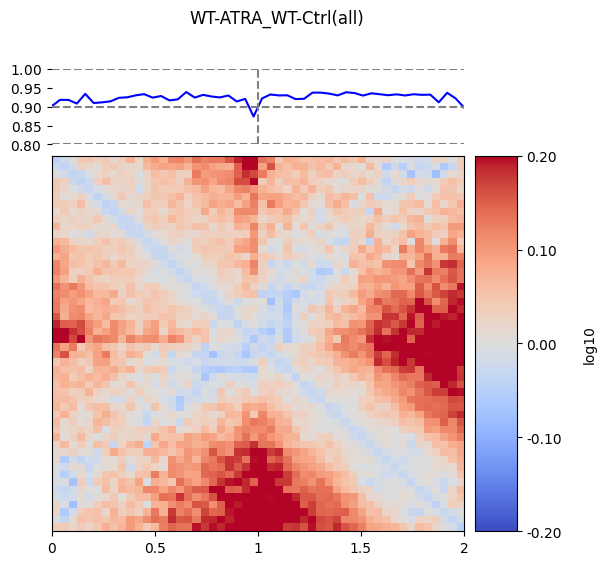

BKO98-ATRA-5days-4-51-and-4-52-R1R2 BKO98-Ctrl-4-51-and-4-52-R1R2
0.8556879980025833 0.9278366356178942


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 27 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'K', 'R', 'T', 'a', 'eight', 'five', 'g', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 27, 28, 36, 37, 38, 46, 53, 55, 66, 68, 74, 79, 82, 85, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 27 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'K', 'R', 'T', 'a', 'ei

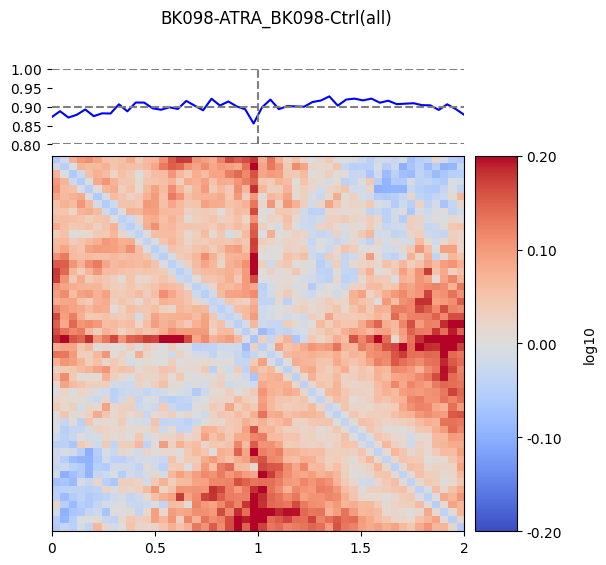

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped


WT-ATRA-5days-4-51-and-4-52-R1R2_long WT-Ctrl-4-51-and-4-52-R1R2_long
0.8724532789913182 0.9458920367007276


INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 26 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'R', 'T', 'W', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 27, 28, 36, 38, 53, 55, 58, 66, 74, 79, 81, 82, 85, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 26 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'R', 'T', 'W', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph

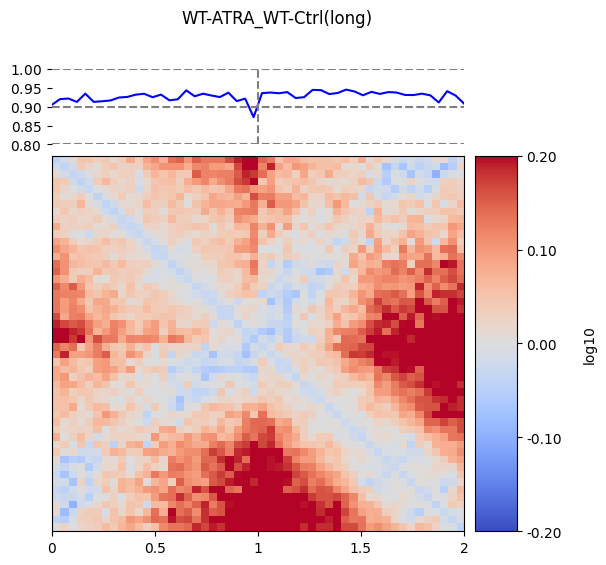

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned


BKO98-ATRA-5days-4-51-and-4-52-R1R2_long BKO98-Ctrl-4-51-and-4-52-R1R2_long
0.8266761653354985 0.9305105748780177


INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 27 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'K', 'R', 'T', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 27, 28, 36, 37, 38, 46, 53, 55, 66, 74, 79, 81, 82, 85, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 27 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'K', 'R', 'T', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 2

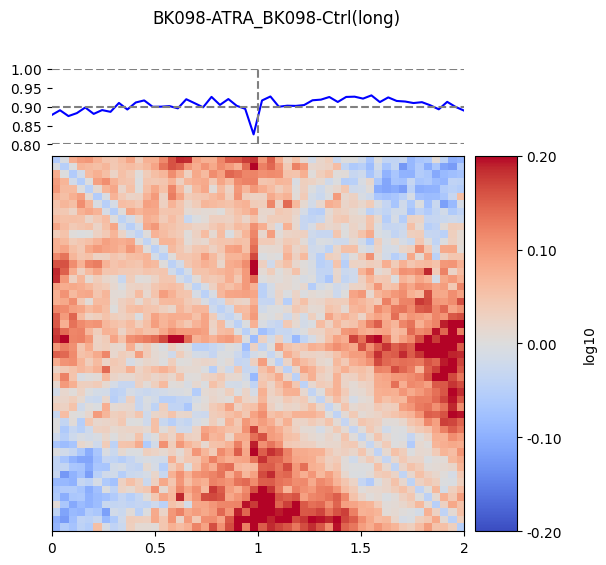

WT-ATRA-5days-4-51-and-4-52-R1R2_short WT-Ctrl-4-51-and-4-52-R1R2_short
0.7120327640185056 0.9427494384799336


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 28 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'R', 'T', 'W', 'eight', 'five', 'g', 'h', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 26, 27, 28, 36, 38, 53, 55, 58, 66, 74, 75, 79, 82, 85, 86, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 28 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'R', 'T', 'W', 

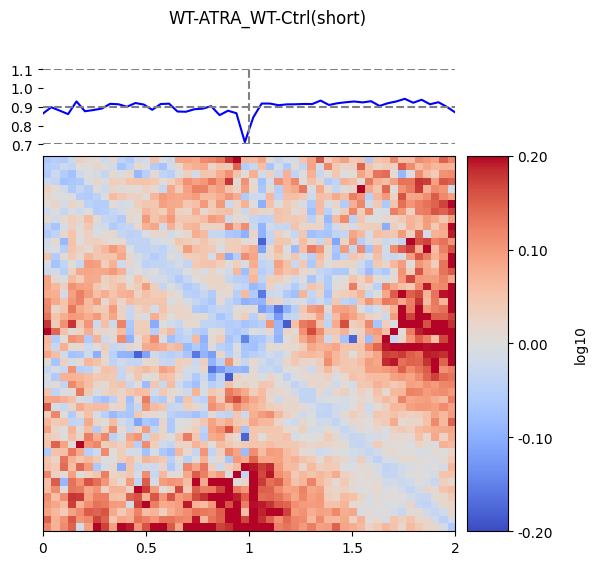

BKO98-ATRA-5days-4-51-and-4-52-R1R2_short BKO98-Ctrl-4-51-and-4-52-R1R2_short
0.7744327786811309 1.006734024850031


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 29 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'K', 'R', 'T', 'eight', 'five', 'g', 'h', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 26, 27, 28, 36, 37, 38, 46, 53, 55, 66, 74, 75, 79, 82, 85, 86, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 29 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', '

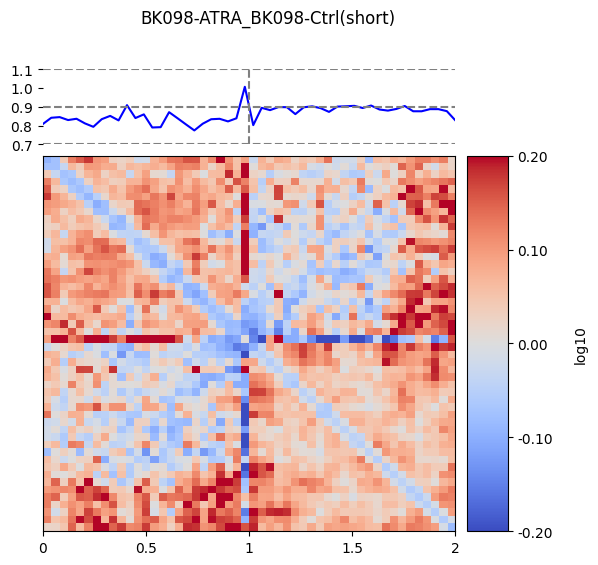

In [11]:
#CTobs (range -0.2 to 0.2)
#all
plot_ratio_matrix_withlineplot("Cis/CTobs/","WT-ATRA-5days-4-51-and-4-52-R1R2","WT-Ctrl-4-51-and-4-52-R1R2","WT-ATRA_WT-Ctrl(all)",-0.2,0.2,0.8,1)
plot_ratio_matrix_withlineplot("Cis/CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2","BKO98-Ctrl-4-51-and-4-52-R1R2","BK098-ATRA_BK098-Ctrl(all)",-0.2,0.2,0.8,1)
#long
plot_ratio_matrix_withlineplot("Cis/CTobs/","WT-ATRA-5days-4-51-and-4-52-R1R2_long","WT-Ctrl-4-51-and-4-52-R1R2_long","WT-ATRA_WT-Ctrl(long)",-0.2,0.2,0.8,1)
plot_ratio_matrix_withlineplot("Cis/CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_long","BKO98-Ctrl-4-51-and-4-52-R1R2_long","BK098-ATRA_BK098-Ctrl(long)",-0.2,0.2,0.8,1)
#short
plot_ratio_matrix_withlineplot("Cis/CTobs/","WT-ATRA-5days-4-51-and-4-52-R1R2_short","WT-Ctrl-4-51-and-4-52-R1R2_short","WT-ATRA_WT-Ctrl(short)",-0.2,0.2,0.7,1.1)
plot_ratio_matrix_withlineplot("Cis/CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_short","BKO98-Ctrl-4-51-and-4-52-R1R2_short","BK098-ATRA_BK098-Ctrl(short)",-0.2,0.2,0.7,1.1)

BKO98-Ctrl-4-51-and-4-52-R1R2 WT-Ctrl-4-51-and-4-52-R1R2
0.9731385653335296 1.0024035082763785


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 28 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'K', 'T', 'W', 'a', 'eight', 'five', 'g', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'seven', 'space', 't', 'three', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 26, 27, 28, 37, 38, 46, 55, 58, 66, 68, 74, 79, 82, 85, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 28 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'K', 'T', '

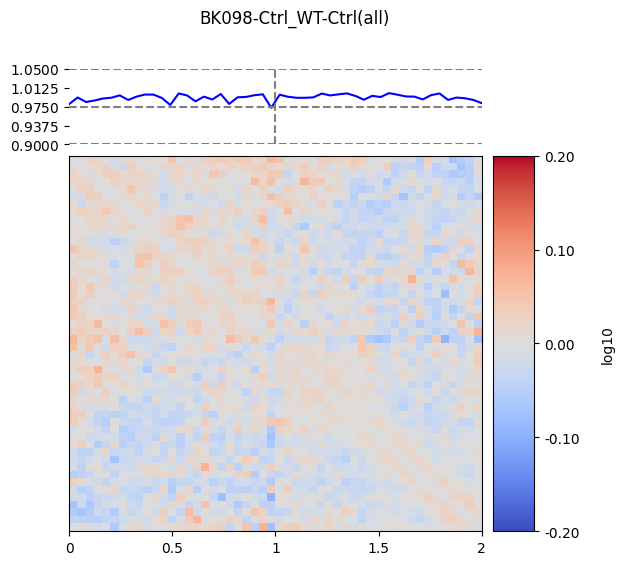

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned


BKO98-ATRA-5days-4-51-and-4-52-R1R2 WT-ATRA-5days-4-51-and-4-52-R1R2
0.9343712442674932 0.9939858443469479


INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 27 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'K', 'R', 'T', 'W', 'a', 'eight', 'five', 'g', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'seven', 'space', 'three', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 26, 27, 28, 36, 37, 46, 53, 55, 58, 66, 68, 74, 79, 82]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 27 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'K', 'R', 'T', 'W', 'a', 'eight', 'five', 'g', 'hyphen', 'l', 'nine', 'nonmarkingreturn'

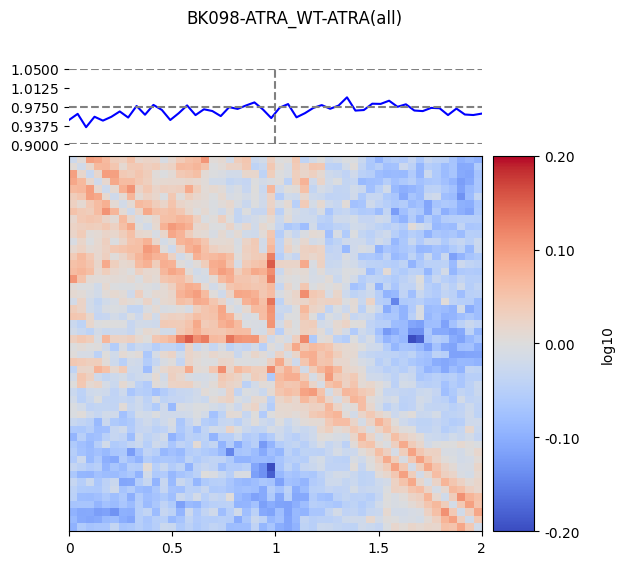

BKO98-Ctrl-4-51-and-4-52-R1R2_long WT-Ctrl-4-51-and-4-52-R1R2_long
0.9790827029105462 1.0047588587736849


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 28 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'K', 'T', 'W', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'seven', 'space', 't', 'three', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 26, 27, 28, 37, 38, 46, 55, 58, 66, 74, 79, 81, 82, 85, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 28 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'K', 'T', '

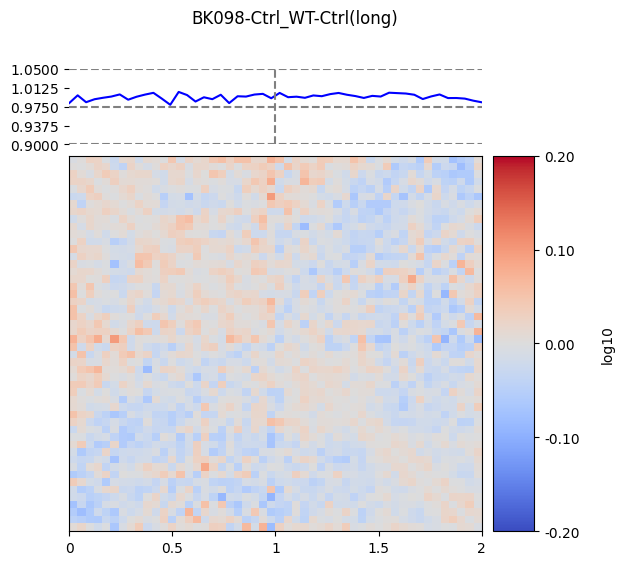

BKO98-ATRA-5days-4-51-and-4-52-R1R2_long WT-ATRA-5days-4-51-and-4-52-R1R2_long
0.9343359063738608 0.9931895223573602


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 27 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'K', 'R', 'T', 'W', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'seven', 'space', 'three', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 24, 26, 27, 28, 36, 37, 46, 53, 55, 58, 66, 74, 79, 81, 82]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 27 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'K', 'R', 'T', 'W', 

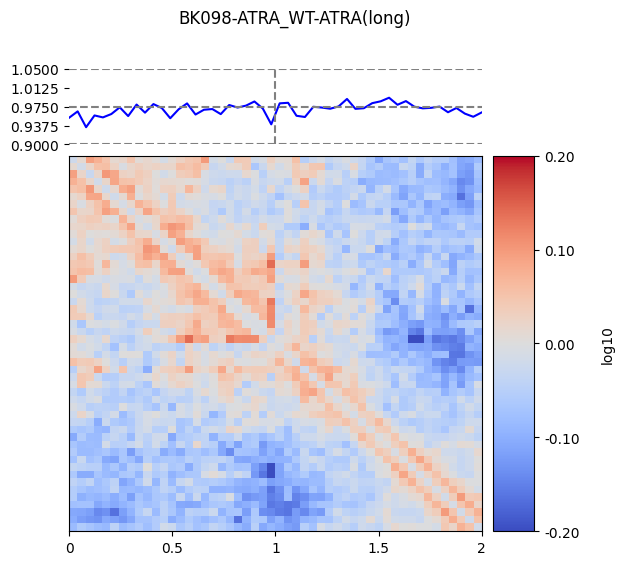

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned


BKO98-Ctrl-4-51-and-4-52-R1R2_short WT-Ctrl-4-51-and-4-52-R1R2_short
0.7317728858095545 1.0205075851146466


INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 28 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'K', 'T', 'W', 'eight', 'five', 'g', 'h', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 26, 27, 28, 37, 38, 46, 55, 58, 66, 74, 75, 79, 82, 85, 86, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 28 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'K', 'T', 'W', 'eight', 'five', 'g', 'h', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16,

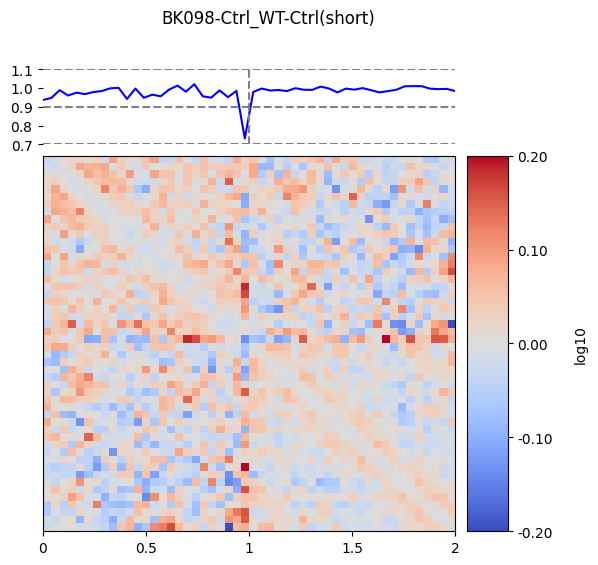

BKO98-ATRA-5days-4-51-and-4-52-R1R2_short WT-ATRA-5days-4-51-and-4-52-R1R2_short
0.8272742225234831 1.0346443307600774


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 29 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'K', 'R', 'T', 'W', 'eight', 'five', 'g', 'h', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 26, 27, 28, 36, 37, 46, 53, 55, 58, 66, 74, 75, 79, 82, 85, 86, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 29 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'K', '

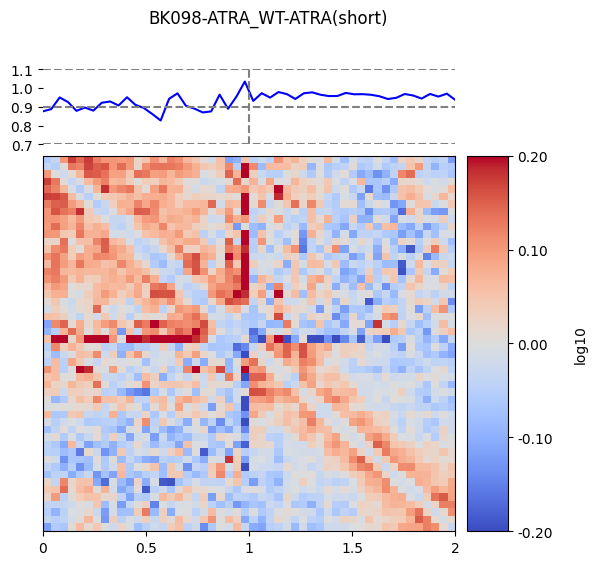

In [5]:
#CTobs (top/WT & top-atra/WT-atra, range -0.2 to 0.2)
#all
plot_ratio_matrix_withlineplot("Cis/CTobs/","BKO98-Ctrl-4-51-and-4-52-R1R2","WT-Ctrl-4-51-and-4-52-R1R2","BK098-Ctrl_WT-Ctrl(all)",-0.2,0.2,0.9,1.05)
plot_ratio_matrix_withlineplot("Cis/CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2","WT-ATRA-5days-4-51-and-4-52-R1R2","BK098-ATRA_WT-ATRA(all)",-0.2,0.2,0.9,1.05)
#long
plot_ratio_matrix_withlineplot("Cis/CTobs/","BKO98-Ctrl-4-51-and-4-52-R1R2_long","WT-Ctrl-4-51-and-4-52-R1R2_long","BK098-Ctrl_WT-Ctrl(long)",-0.2,0.2,0.9,1.05)
plot_ratio_matrix_withlineplot("Cis/CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_long","WT-ATRA-5days-4-51-and-4-52-R1R2_long","BK098-ATRA_WT-ATRA(long)",-0.2,0.2,0.9,1.05)
#short
plot_ratio_matrix_withlineplot("Cis/CTobs/","BKO98-Ctrl-4-51-and-4-52-R1R2_short","WT-Ctrl-4-51-and-4-52-R1R2_short","BK098-Ctrl_WT-Ctrl(short)",-0.2,0.2,0.7,1.1)
plot_ratio_matrix_withlineplot("Cis/CTobs/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_short","WT-ATRA-5days-4-51-and-4-52-R1R2_short","BK098-ATRA_WT-ATRA(short)",-0.2,0.2,0.7,1.1)

WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_all WT-Ctrl-4-51-and-4-52-R1R2_hg38_all
0.9035309058307209 0.9834353019959985


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 26 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'R', 'T', 'W', 'a', 'eight', 'five', 'g', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 27, 28, 36, 38, 53, 55, 58, 66, 68, 74, 79, 82, 85, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 26 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'R', 'T', 'W', 'a', 'eight', 'five', 

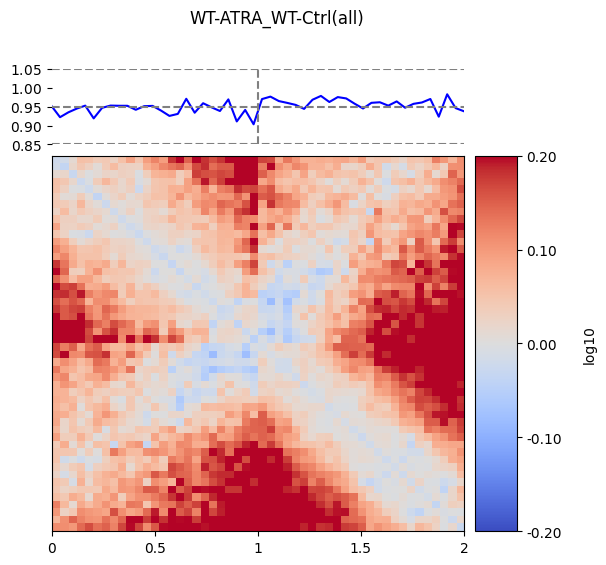

BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_all BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_all
0.8899479412617711 1.020641576912886


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 27 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'K', 'R', 'T', 'a', 'eight', 'five', 'g', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 27, 28, 36, 37, 38, 46, 53, 55, 66, 68, 74, 79, 82, 85, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 27 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'K', 'R', 'T', 'a', 'ei

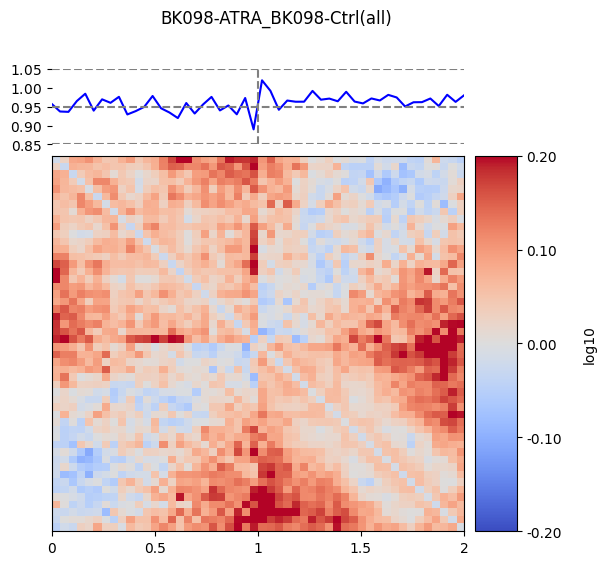

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned


WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_long WT-Ctrl-4-51-and-4-52-R1R2_hg38_long
0.9043901523058706 0.9952842903289075


INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 26 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'R', 'T', 'W', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 27, 28, 36, 38, 53, 55, 58, 66, 74, 79, 81, 82, 85, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 26 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'R', 'T', 'W', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 1

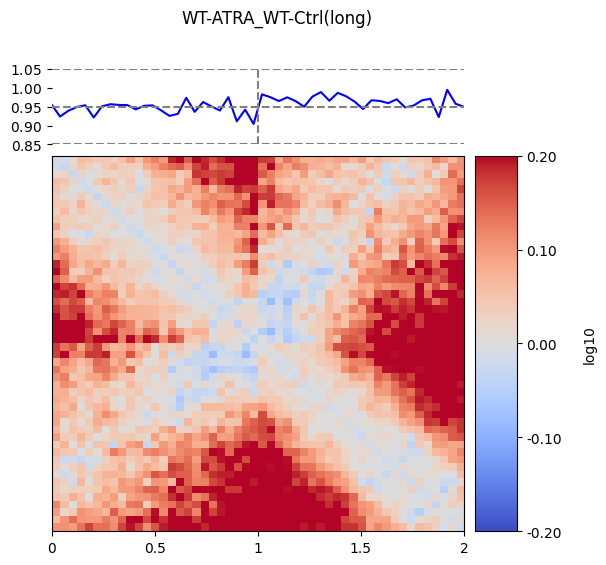

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned


BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_long BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_long
0.881220941867564 1.0269116173307975


INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 27 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'K', 'R', 'T', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 27, 28, 36, 37, 38, 46, 53, 55, 66, 74, 79, 81, 82, 85, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 27 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'K', 'R', 'T', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 2

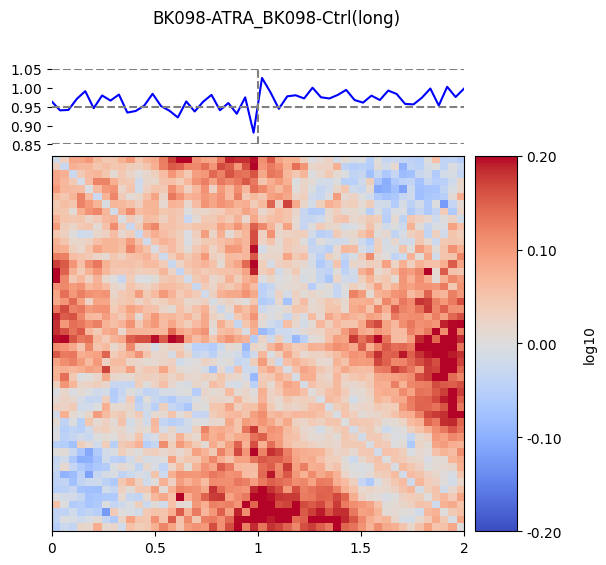

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned


WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_short WT-Ctrl-4-51-and-4-52-R1R2_hg38_short
0.7513454605846901 0.9839096559410891


INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 28 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'R', 'T', 'W', 'eight', 'five', 'g', 'h', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 26, 27, 28, 36, 38, 53, 55, 58, 66, 74, 75, 79, 82, 85, 86, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 28 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'R', 'T', 'W', 'eight', 'five', 'g', 'h', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Gly

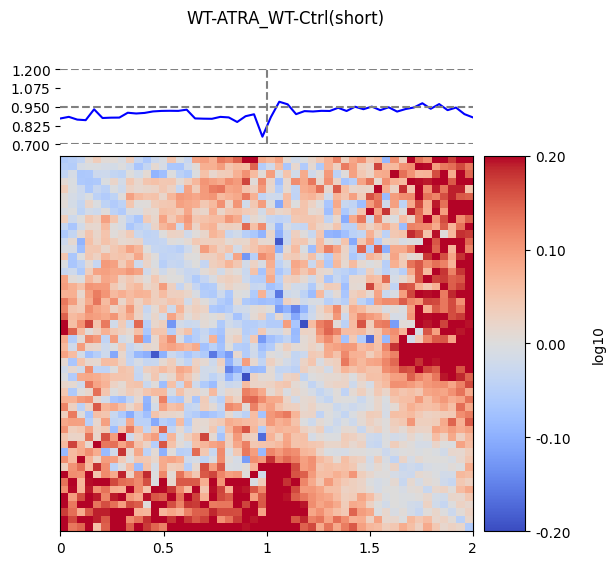

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped


BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_short BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_short
0.7707422591555301 1.1136615102104783


INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 29 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'K', 'R', 'T', 'eight', 'five', 'g', 'h', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 26, 27, 28, 36, 37, 38, 46, 53, 55, 66, 74, 75, 79, 82, 85, 86, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 29 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'K', 'R', 'T', 'eight', 'five', 'g', 'h', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'two',

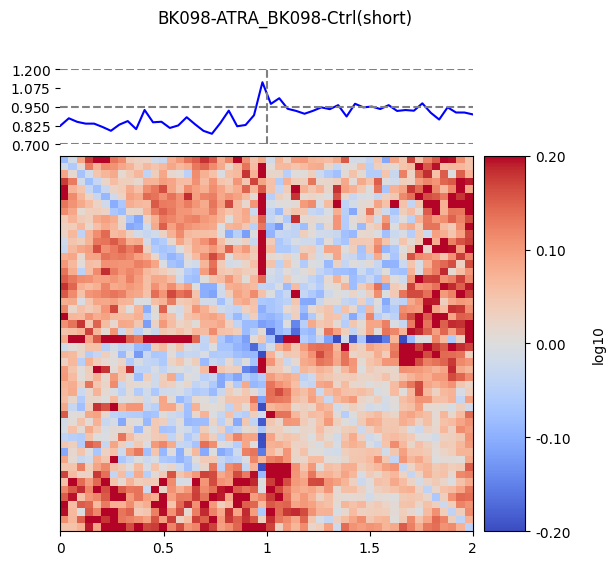

In [16]:
#CTobs_with expected control (range -0.2 to 0.2)
#all
plot_ratio_matrix_withlineplot("Cis/CTexp_cntrl/","WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_all","WT-Ctrl-4-51-and-4-52-R1R2_hg38_all","WT-ATRA_WT-Ctrl(all)",-0.2,0.2,0.85,1.05)
plot_ratio_matrix_withlineplot("Cis/CTexp_cntrl/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_all","BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_all","BK098-ATRA_BK098-Ctrl(all)",-0.2,0.2,0.85,1.05)
#long
plot_ratio_matrix_withlineplot("Cis/CTexp_cntrl/","WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_long","WT-Ctrl-4-51-and-4-52-R1R2_hg38_long","WT-ATRA_WT-Ctrl(long)",-0.2,0.2,0.85,1.05)
plot_ratio_matrix_withlineplot("Cis/CTexp_cntrl/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_long","BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_long","BK098-ATRA_BK098-Ctrl(long)",-0.2,0.2,0.85,1.05)
#short
plot_ratio_matrix_withlineplot("Cis/CTexp_cntrl/","WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_short","WT-Ctrl-4-51-and-4-52-R1R2_hg38_short","WT-ATRA_WT-Ctrl(short)",-0.2,0.2,0.7,1.2)
plot_ratio_matrix_withlineplot("Cis/CTexp_cntrl/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_short","BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_short","BK098-ATRA_BK098-Ctrl(short)",-0.2,0.2,0.7,1.2)

BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_all WT-Ctrl-4-51-and-4-52-R1R2_hg38_all
0.9842327825526609 1.0388916256844445


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 27 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'K', 'T', 'W', 'a', 'eight', 'five', 'g', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'seven', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 26, 27, 28, 37, 38, 46, 55, 58, 66, 68, 74, 79, 82, 85, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 27 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'K', 'T', 'W', 'a', 'eig

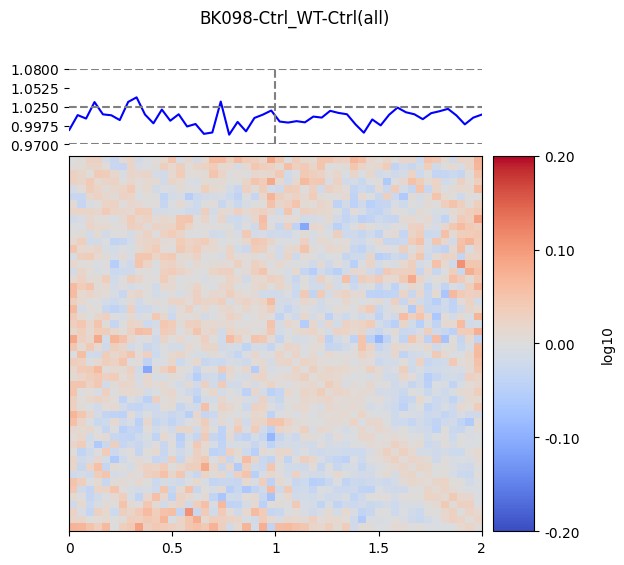

INFO:fontTools.subset:maxp pruned


BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_all WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_all
0.9725477293730358 1.0648491741999537


INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 26 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'K', 'R', 'T', 'W', 'a', 'eight', 'five', 'g', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'seven', 'space', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 26, 27, 28, 36, 37, 46, 53, 55, 58, 66, 68, 74, 79, 82]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 26 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'K', 'R', 'T', 'W', 'a', 'eight', 'five', 'g', 'hyphen', 'l', 'nine

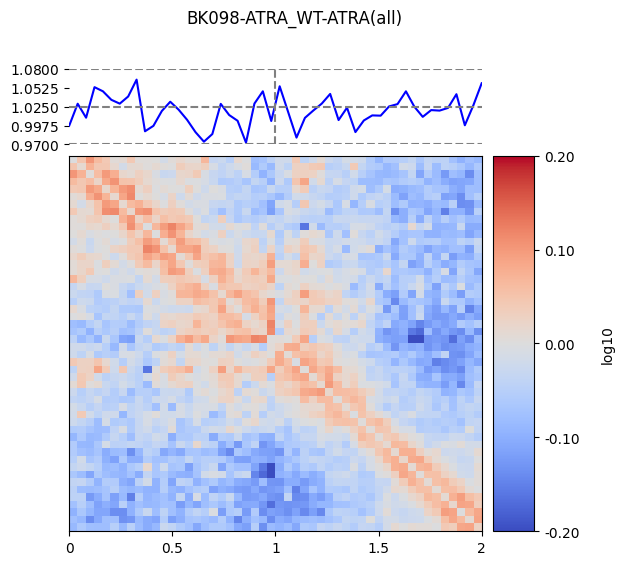

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned


BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_long WT-Ctrl-4-51-and-4-52-R1R2_hg38_long
0.9845850600431382 1.040564724198226


INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 27 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'K', 'T', 'W', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'seven', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 26, 27, 28, 37, 38, 46, 55, 58, 66, 74, 79, 81, 82, 85, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 27 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'K', 'T', 'W', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 'seven', 'space', 't',

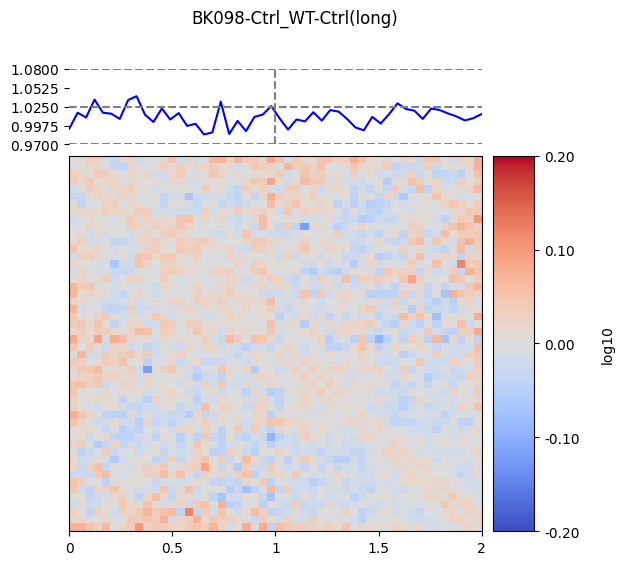

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned


BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_long WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_long
0.9736946991986646 1.0707067297090616


INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 26 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'K', 'R', 'T', 'W', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'seven', 'space', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 26, 27, 28, 36, 37, 46, 53, 55, 58, 66, 74, 79, 81, 82]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 26 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'K', 'R', 'T', 'W', 'eight', 'five', 'g', 'hyphen', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'seven', 'space', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 1

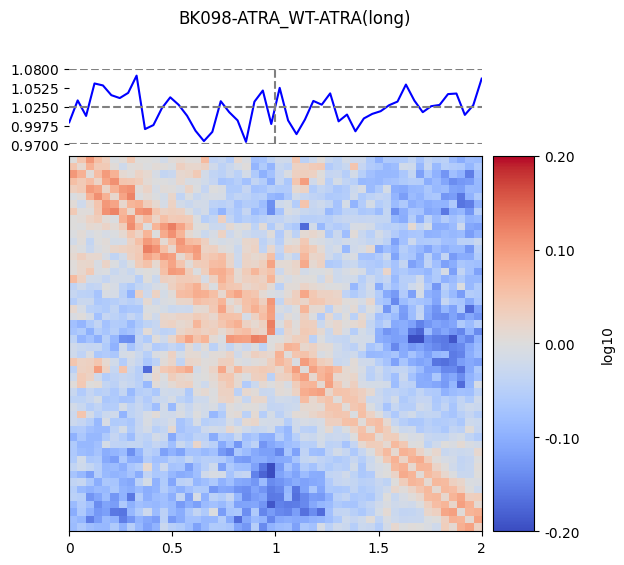

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned


BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_short WT-Ctrl-4-51-and-4-52-R1R2_hg38_short
0.7466313458622738 1.0677467745942812


INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 28 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'K', 'T', 'W', 'eight', 'five', 'g', 'h', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 26, 27, 28, 37, 38, 46, 55, 58, 66, 74, 75, 79, 82, 85, 86, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 28 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'K', 'T', 'W', 'eight', 'five', 'g', 'h', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven',

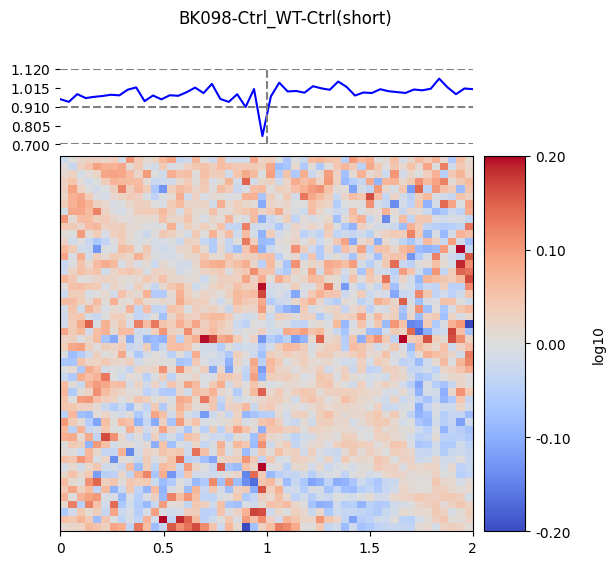

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned


BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_short WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_short
0.8494236350202158 1.106674141022161


INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 29 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'K', 'R', 'T', 'W', 'eight', 'five', 'g', 'h', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 26, 27, 28, 36, 37, 46, 53, 55, 58, 66, 74, 75, 79, 82, 85, 86, 87]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 29 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'K', 'R', 'T', 'W', 'eight', 'five', 'g', 'h', 'hyphen', 'l', 'nine', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 

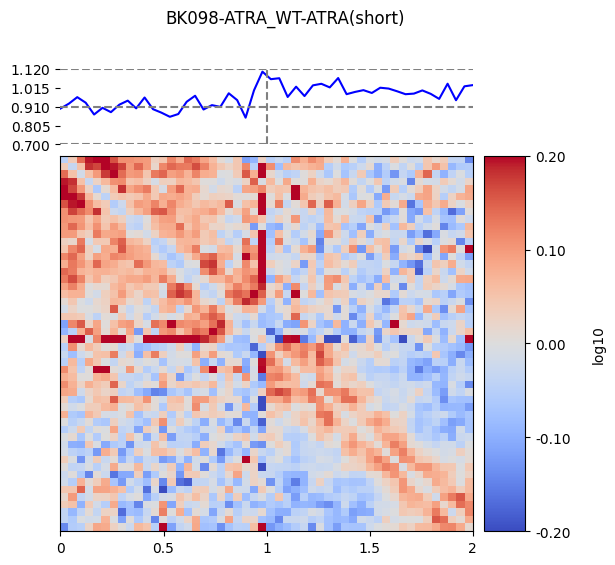

In [17]:
#CTobs with exp_control (top/WT & top-atra/WT-atra, range -0.2 to 0.2)
#all
plot_ratio_matrix_withlineplot("Cis/CTexp_cntrl/","BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_all","WT-Ctrl-4-51-and-4-52-R1R2_hg38_all","BK098-Ctrl_WT-Ctrl(all)",-0.2,0.2,0.97,1.08)
plot_ratio_matrix_withlineplot("Cis/CTexp_cntrl/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_all","WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_all","BK098-ATRA_WT-ATRA(all)",-0.2,0.2,0.97,1.08)
#long
plot_ratio_matrix_withlineplot("Cis/CTexp_cntrl/","BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_long","WT-Ctrl-4-51-and-4-52-R1R2_hg38_long","BK098-Ctrl_WT-Ctrl(long)",-0.2,0.2,0.97,1.08)
plot_ratio_matrix_withlineplot("Cis/CTexp_cntrl/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_long","WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_long","BK098-ATRA_WT-ATRA(long)",-0.2,0.2,0.97,1.08)
#short
plot_ratio_matrix_withlineplot("Cis/CTexp_cntrl/","BKO98-Ctrl-4-51-and-4-52-R1R2_hg38_short","WT-Ctrl-4-51-and-4-52-R1R2_hg38_short","BK098-Ctrl_WT-Ctrl(short)",-0.2,0.2,0.7,1.12)
plot_ratio_matrix_withlineplot("Cis/CTexp_cntrl/","BKO98-ATRA-5days-4-51-and-4-52-R1R2_hg38_short","WT-ATRA-5days-4-51-and-4-52-R1R2_hg38_short","BK098-ATRA_WT-ATRA(short)",-0.2,0.2,0.7,1.12)